In [1]:
# Slippery slope :: 20% chance that the agent will slip and take a random action instead of the intended one
# Wine : 50% chance that the next action is randomized

# State space :
# ROWS * COLUMNS * IsFirstCheckPointVisited * isSecondCheckVisited
# Action :
# UP, DOWN, LEFT, RIGHT

# Maximum episode length : 1000

# 1. Train over 10 Different seeds
# 2. Plot average learning curves
#       :: Qlearning_plot
#       :: sarsa_plot
#       :: expected_sarsa_plot.png
# 3. Plot average Goal visits # safe goal v/s risky goal
# 4. Perform Evaluation :: run evaluation over 100 episodes with new seed
# 5. Report results in cliff_evaluation_results.json :: mean and SD of the rewards
# 6. Generate GIFs

In [2]:
from agent import SARSA, q_learning_for_cliff, expected_SARSA
from cliff import MultiGoalCliffWalkingEnv
import numpy as np

training_seeds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
results = {}
algorithms = ["QLearning", "Sarsa", "ExpectedSarsa"]

Number of states in the state space is :: 800
Number of actions in the action space is :: 4
Running for seed : 0
Total rewards after 0 episodes : -50
Total rewards after 5000 episodes : 158
Total rewards after 10000 episodes : 116
Total rewards after 15000 episodes : 169
Running for seed : 10
Total rewards after 0 episodes : -52
Total rewards after 5000 episodes : 166
Total rewards after 10000 episodes : 100
Total rewards after 15000 episodes : 154
Running for seed : 20
Total rewards after 0 episodes : -64
Total rewards after 5000 episodes : 172
Total rewards after 10000 episodes : 172
Total rewards after 15000 episodes : 172
Running for seed : 30
Total rewards after 0 episodes : -50
Total rewards after 5000 episodes : 156
Total rewards after 10000 episodes : 158
Total rewards after 15000 episodes : 110
Running for seed : 40
Total rewards after 0 episodes : -61
Total rewards after 5000 episodes : 47
Total rewards after 10000 episodes : 168
Total rewards after 15000 episodes : 162
Runni

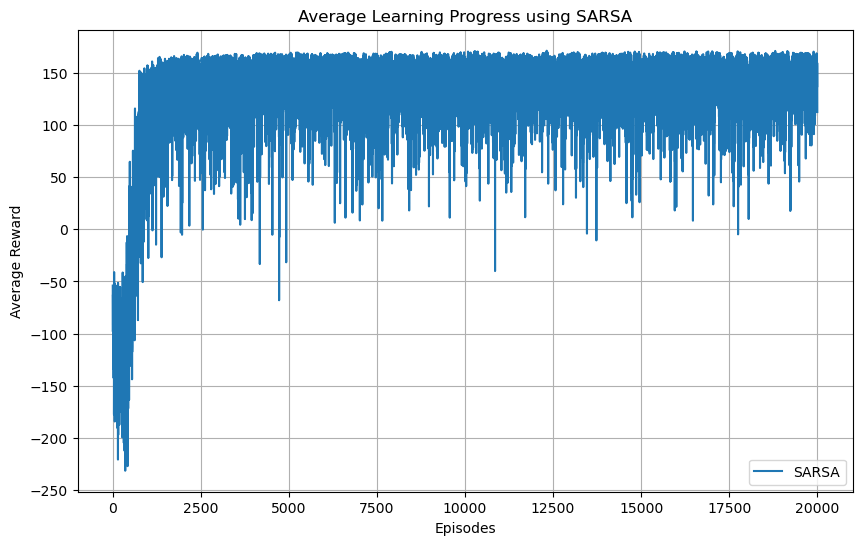

safe_visits : 96.6 risky_visits : 18229.4


In [3]:
# SARSA
env = MultiGoalCliffWalkingEnv(render_mode="none")
Q, episode_rewards, safe_visits, risky_visits = SARSA(env)

print(f"safe_visits : {safe_visits} risky_visits : {risky_visits}")
results["Sarsa"] = {
    "Q" : Q,
    "safe_visits" : safe_visits,
    "risky_visits" : risky_visits
}

Number of states in the state space is :: 800
Number of actions in the action space is :: 4
Running for seed : 0
Total rewards after 0 episodes : -50
Total rewards after 5000 episodes : 174
Total rewards after 10000 episodes : 174
Total rewards after 15000 episodes : 173
Running for seed : 10
Total rewards after 0 episodes : -52
Total rewards after 5000 episodes : -50
Total rewards after 10000 episodes : 170
Total rewards after 15000 episodes : 168
Running for seed : 20
Total rewards after 0 episodes : -64
Total rewards after 5000 episodes : 19
Total rewards after 10000 episodes : -72
Total rewards after 15000 episodes : 170
Running for seed : 30
Total rewards after 0 episodes : -50
Total rewards after 5000 episodes : 18
Total rewards after 10000 episodes : 12
Total rewards after 15000 episodes : 172
Running for seed : 40
Total rewards after 0 episodes : -61
Total rewards after 5000 episodes : -83
Total rewards after 10000 episodes : 170
Total rewards after 15000 episodes : 168
Running

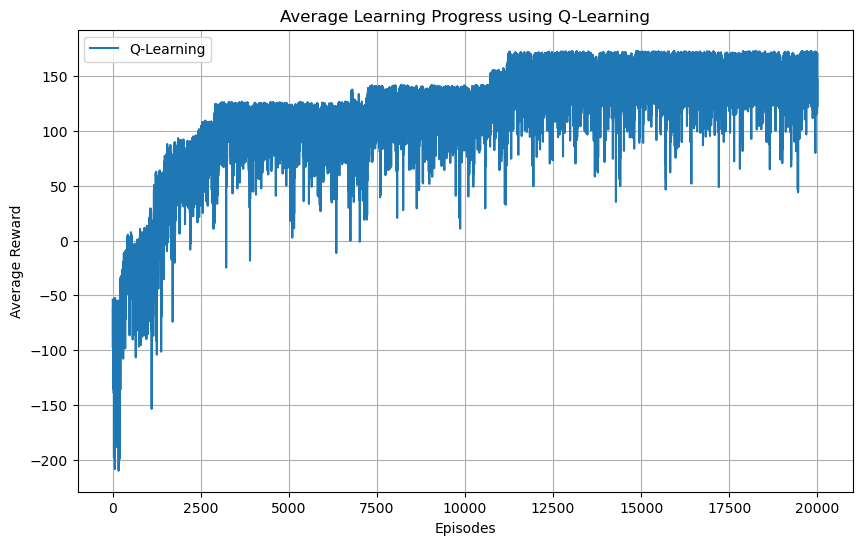

safe_visits : 3409.2 risky_visits : 14993.9


In [4]:
# Q Learning
env = MultiGoalCliffWalkingEnv(render_mode="none")
Q, episode_rewards, safe_visits, risky_visits = q_learning_for_cliff(env)

print(f"safe_visits : {safe_visits} risky_visits : {risky_visits}")

results["QLearning"] = {
    "Q" : Q,
    "safe_visits" : safe_visits,
    "risky_visits" : risky_visits
}

Number of states in the state space is :: 800
Number of actions in the action space is :: 4
Running for seed : 0
Total rewards after 0 episodes : -50
Total rewards after 5000 episodes : 170
Total rewards after 10000 episodes : -50
Total rewards after 15000 episodes : 172
Running for seed : 10
Total rewards after 0 episodes : -52
Total rewards after 5000 episodes : 172
Total rewards after 10000 episodes : 170
Total rewards after 15000 episodes : 174
Running for seed : 20
Total rewards after 0 episodes : -64
Total rewards after 5000 episodes : 140
Total rewards after 10000 episodes : 172
Total rewards after 15000 episodes : 174
Running for seed : 30
Total rewards after 0 episodes : -50
Total rewards after 5000 episodes : -27
Total rewards after 10000 episodes : 174
Total rewards after 15000 episodes : 172
Running for seed : 40
Total rewards after 0 episodes : -61
Total rewards after 5000 episodes : 119
Total rewards after 10000 episodes : 170
Total rewards after 15000 episodes : 174
Runn

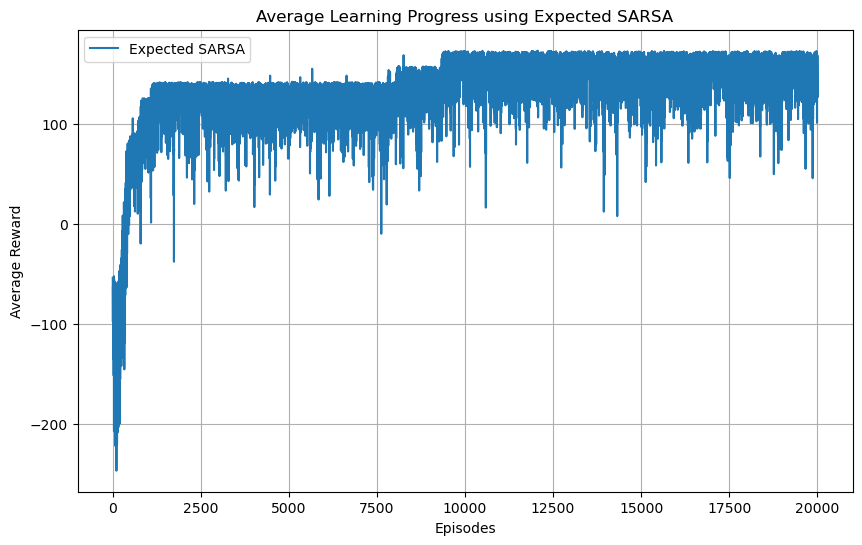

safe_visits : 1772.7 risky_visits : 17011.3


In [5]:
# Expected SARSA
env = MultiGoalCliffWalkingEnv(render_mode="none")
Q, episode_rewards, safe_visits, risky_visits = expected_SARSA(env)

print(f"safe_visits : {safe_visits} risky_visits : {risky_visits}")

results["ExpectedSarsa"] = {
    "Q" : Q,
    "safe_visits" : safe_visits,
    "risky_visits" : risky_visits
}

Grouped bar chart saved at: plots\average_goal_visits.png


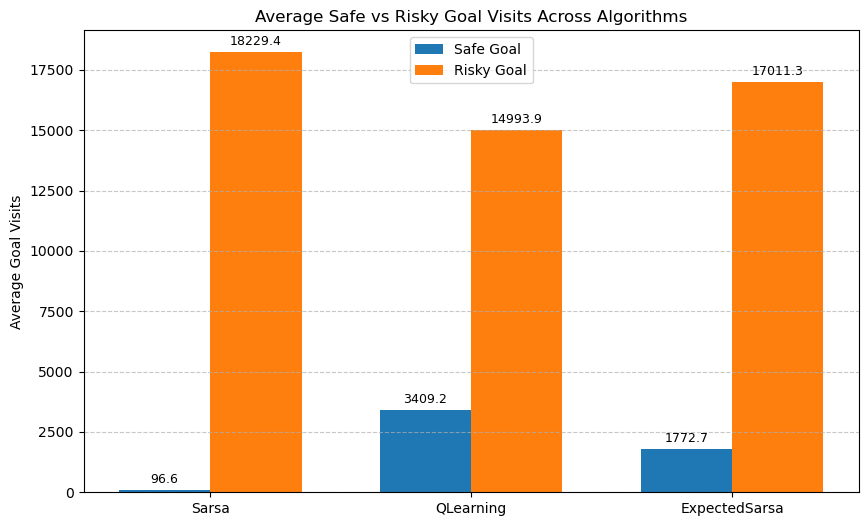

In [6]:
# Question 1.3 :: Plot Average Goal Visits
from utils.plotUtils import plot_average_goal_visits
plot_average_goal_visits(results, algorithms)

In [7]:
# Question 1.4 :: Perform Evaluation: Take the ”best Q-table” for each of the three algorithms and run a evaluation for 100 episodes. 
# Question 1.5 :: Report the mean and standard deviation of the rewards obtained  in cliff evaluation results.json
from utils.algoUtils import evaluate_policy
import json

final_report = {}

for algo_name, algo_results in results.items():
    env = MultiGoalCliffWalkingEnv(render_mode="rgb_array")
    rewards, safe_visits, risky_visits = evaluate_policy(env, algo_results["Q"])
    mean_reward = float(np.mean(rewards))
    std_reward = float(np.std(rewards))
    print(f"For algorithm : {algo_name}, we got avg_reward : {mean_reward}, std_reward : {std_reward}, safe_visits : {safe_visits}, risky_visits = {risky_visits}")

    final_report[algo_name] = {
        "mean": mean_reward,
        "std": std_reward
    }
    
    out_file = "evaluation/cliff_evaluation_results.json"
    
# save to JSON
with open(out_file, "w") as f:
    json.dump(final_report, f, indent=4)

print(f"Saved evaluation results to {out_file}")

For algorithm : Sarsa, we got avg_reward : 170.74, std_reward : 25.16172490112711, safe_visits : 0, risky_visits = 99
For algorithm : QLearning, we got avg_reward : 170.84, std_reward : 25.15301969943172, safe_visits : 0, risky_visits = 99
For algorithm : ExpectedSarsa, we got avg_reward : 170.98, std_reward : 25.14715888524984, safe_visits : 0, risky_visits = 99
Saved evaluation results to evaluation/cliff_evaluation_results.json


In [8]:
# Question 1.6 :: Generate GIFS
from utils.algoUtils import generate_gif

env = MultiGoalCliffWalkingEnv(render_mode="rgb_array")

generate_gif(env, results["Sarsa"]["Q"], "sarsa.gif")
generate_gif(env, results["QLearning"]["Q"], "qlearning.gif")
generate_gif(env, results["ExpectedSarsa"]["Q"], "expected_sarsa.gif")

risky
Saved GIF: gifs\sarsa.gif
risky
Saved GIF: gifs\qlearning.gif
risky
Saved GIF: gifs\expected_sarsa.gif
